In [1]:
import pandas as pd
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
series = Series.from_csv('champagne_sales.csv', header = 0)
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [3]:
split_point = len(series) - 12

In [4]:
dataset, validation = series[0:split_point], series[split_point:]

In [5]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('champagne_dataset.csv')
validation.to_csv('champagne_validation.csv')

Dataset 93, Validation 12


we evaluate the performance of predictions using root mean squared error

from sklearn.metrics import mean_squared_error
from math import sqrt
test = ...
predictions = ...
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

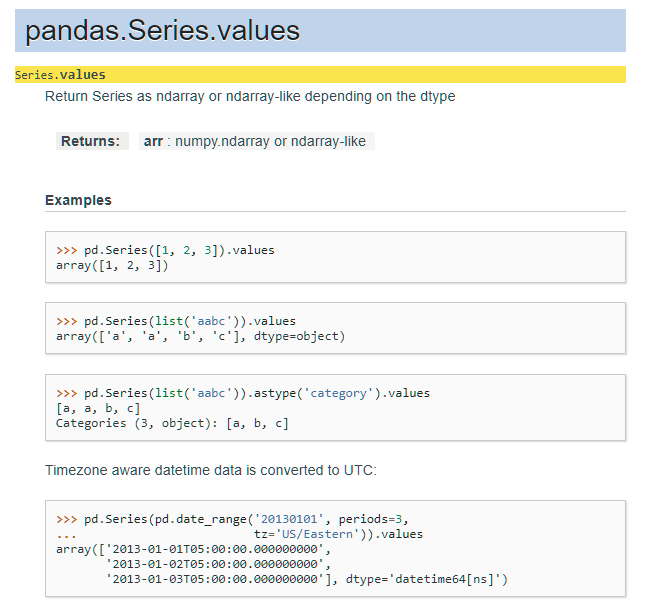

In [6]:
#prepare data 
# ATTRIBUTE: Return Series as ndarray or ndarray-like
X = series.values
X = X.astype(dtype='float64',casting='unsafe')
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]

Next, we can iterate over the time steps in the test dataset. The train dataset is stored in a Python list as we need to easily append a new observation each iteration and NumPy array concatenation feels like overkill.

The prediction made by the model is called yhat for convention, as the outcome or observation is referred to as y and yhat (a ‘y‘ with a mark above) is the mathematical notation for the prediction of the y variable.

The prediction and observation are printed each observation for a sanity check prediction in case there are issues with the model.

In [15]:
# walk forward validation
history =[x for x in train]
history

[2815.0,
 2672.0,
 2755.0,
 2721.0,
 2946.0,
 3036.0,
 2282.0,
 2212.0,
 2922.0,
 4301.0,
 5764.0,
 7312.0,
 2541.0,
 2475.0,
 3031.0,
 3266.0,
 3776.0,
 3230.0,
 3028.0,
 1759.0,
 3595.0,
 4474.0,
 6838.0,
 8357.0,
 3113.0,
 3006.0,
 4047.0,
 3523.0,
 3937.0,
 3986.0,
 3260.0,
 1573.0,
 3528.0,
 5211.0,
 7614.0,
 9254.0,
 5375.0,
 3088.0,
 3718.0,
 4514.0,
 4520.0,
 4539.0,
 3663.0,
 1643.0,
 4739.0,
 5428.0,
 8314.0,
 10651.0,
 3633.0,
 4292.0,
 4154.0,
 4121.0]

In [17]:
predictions = list()
for i in range(len(test)):
    y_hat = 3*(i**2 + 1)
    predictions.append(y_hat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected = %.3f' % (y_hat, obs))

>Predicted=3.000, Expected = 4647.000
>Predicted=6.000, Expected = 4753.000
>Predicted=15.000, Expected = 3965.000
>Predicted=30.000, Expected = 1723.000
>Predicted=51.000, Expected = 5048.000
>Predicted=78.000, Expected = 6922.000
>Predicted=111.000, Expected = 9858.000
>Predicted=150.000, Expected = 11331.000
>Predicted=195.000, Expected = 4016.000
>Predicted=246.000, Expected = 3957.000
>Predicted=303.000, Expected = 4510.000
>Predicted=366.000, Expected = 4276.000
>Predicted=435.000, Expected = 4968.000
>Predicted=510.000, Expected = 4677.000
>Predicted=591.000, Expected = 3523.000
>Predicted=678.000, Expected = 1821.000
>Predicted=771.000, Expected = 5222.000
>Predicted=870.000, Expected = 6872.000
>Predicted=975.000, Expected = 10803.000
>Predicted=1086.000, Expected = 13916.000
>Predicted=1203.000, Expected = 2639.000
>Predicted=1326.000, Expected = 2899.000
>Predicted=1455.000, Expected = 3370.000
>Predicted=1590.000, Expected = 3740.000
>Predicted=1731.000, Expected = 2927.000

# Establish a baseline of performance
This will provide both a template for evaluating models using the proposed test harness and a performance measure by which all more elaborate predictive models can be compared.

The baseline prediction for time series forecasting is called the naive forecast, or persistence. This is where the observation from the previous time step is used as the prediction for the observation at the next time step.

We can plug this directly into the test harness defined in the previous section.

In [20]:
#naive forecast
predictions = list()
for i in range(len(test)):
    y_hat = history[-1]
    predictions.append(y_hat)
    obs = test[i]
    history.append(obs)
    print('> Predicted = %.3f, Expected = %.3f' % (y_hat, obs))
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

> Predicted = 4647.000, Expected = 4647.000
> Predicted = 4647.000, Expected = 4753.000
> Predicted = 4753.000, Expected = 3965.000
> Predicted = 3965.000, Expected = 1723.000
> Predicted = 1723.000, Expected = 5048.000
> Predicted = 5048.000, Expected = 6922.000
> Predicted = 6922.000, Expected = 9858.000
> Predicted = 9858.000, Expected = 11331.000
> Predicted = 11331.000, Expected = 4016.000
> Predicted = 4016.000, Expected = 3957.000
> Predicted = 3957.000, Expected = 4510.000
> Predicted = 4510.000, Expected = 4276.000
> Predicted = 4276.000, Expected = 4968.000
> Predicted = 4968.000, Expected = 4677.000
> Predicted = 4677.000, Expected = 3523.000
> Predicted = 3523.000, Expected = 1821.000
> Predicted = 1821.000, Expected = 5222.000
> Predicted = 5222.000, Expected = 6872.000
> Predicted = 6872.000, Expected = 10803.000
> Predicted = 10803.000, Expected = 13916.000
> Predicted = 13916.000, Expected = 2639.000
> Predicted = 2639.000, Expected = 2899.000
> Predicted = 2899.000, Ex

#  Autoregressive Integrated Moving Average (ARIMA) Modelling 